In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [81]:
#Importing data into jupyter notebook
data=pd.read_csv('loan.csv')

EDA -Data wrangling, Univariate and Multivariate Analysis

In [82]:
data.shape

(614, 13)

In [83]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [86]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [87]:
#Dropping Loan_ID as it is a unique value for each row and does not impact the dataset
data.drop(['Loan_ID'],axis=1,inplace=True)

In [88]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [89]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [90]:
data['Gender'].replace(np.nan,'Male',inplace=True)

In [91]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [92]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [93]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [94]:
data.dropna(axis=0,inplace=True)

In [95]:
data.shape

(492, 12)

In [96]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,492.000000,492.000000,492.000000,492.000000,492.000000
mean,5502.203252,1572.959187,146.390244,342.000000,0.851626
std,6069.324665,2597.096132,84.352947,64.902747,0.355832
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5936.500000,2250.000000,170.500000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [97]:
#From the above table, the maximum Applicant Income,Co-applicant income and Loan Amount vary widely from the mean and 75th percentile,
#shows the presence of outliers in the data

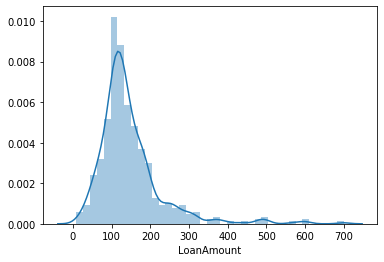

In [98]:
sns.distplot(data['LoanAmount'])

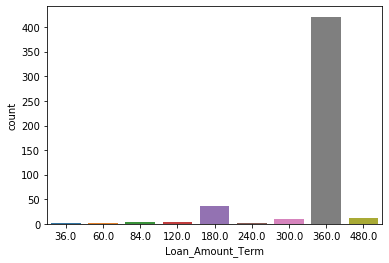

In [99]:
sns.countplot(data['Loan_Amount_Term'])

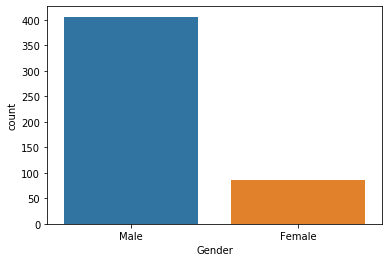

In [100]:
sns.countplot(data['Gender'])

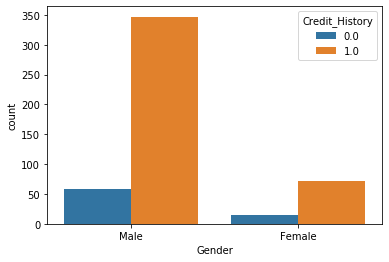

In [101]:
sns.countplot(data['Gender'],hue=data['Credit_History'])

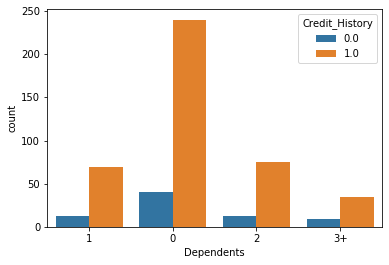

In [102]:
sns.countplot(data['Dependents'],hue=data['Credit_History'])

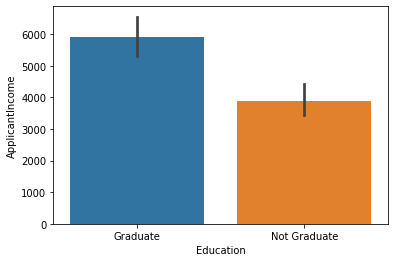

In [103]:
sns.barplot(x=data['Education'],y=data['ApplicantIncome'])

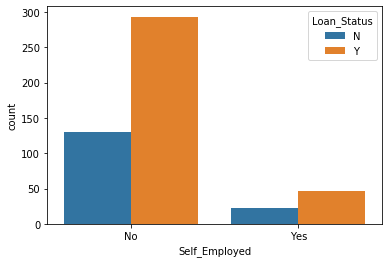

In [104]:
sns.countplot(x=data['Self_Employed'],hue=data['Loan_Status'])

In [105]:
#From the above charts, following observations are made:
#90% of the loans are taken for a period of 360 days
#Majority of the loans are taken by males
#Both males and females have a higher credit history record, most of the credit history records are for bachelors with no dependants
#Most defaulters are salaried employees

In [106]:
#converting object datatypes to binary for processing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for cols in data.columns:
    if data[cols].dtypes=='object':
        data[cols]=le.fit_transform(data[cols])

In [107]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [108]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,0.825203,0.650407,0.786585,0.199187,0.140244,5502.203252,1572.959187,146.390244,342.000000,0.851626,1.020325,0.689024
std,0.380180,0.477327,1.029693,0.399795,0.347593,6069.324665,2597.096132,84.352947,64.902747,0.355832,0.776168,0.463364
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5936.500000,2250.000000,170.500000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,2.000000,1.000000


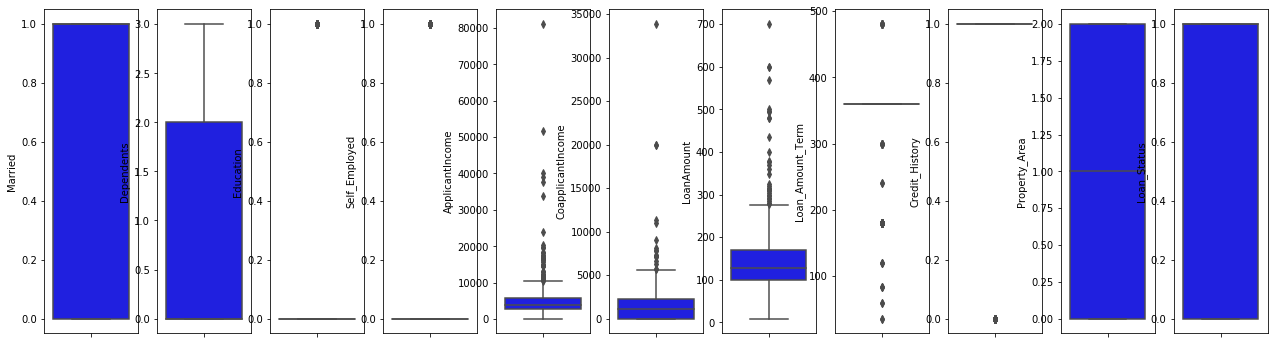

In [109]:
#Outlier detection
collist=data.columns.values
ncol=14
nrow=8
plt.figure(figsize=(2*ncol,4*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[collist[i]],color='blue',orient='v')

In [110]:
#As per the above, certain outliers are present in the data,needs to be removed using zscore
from scipy.stats import zscore
z_sc=np.abs(zscore(data))
print(data.shape)
data=data[(z_sc<3).all(axis=1)]
print(data.shape)

(492, 12)
(462, 12)


In [111]:
#Splitting the attributes and target
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(x.shape)
print(y.shape)

(462, 11)
(462,)


In [112]:
y=y.values.reshape(-1,1)

In [113]:
y.shape

(462, 1)

In [114]:
#Scaling the attributes
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x.shape

(462, 11)

Model Design & Optimisation

In [115]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [116]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(346, 11) (116, 11)
(346, 1) (116, 1)


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_curve

In [118]:
lr=LogisticRegression()
gnb=GaussianNB()
knc=KNeighborsClassifier(n_neighbors=8)
svc=SVC()
dtc=DecisionTreeClassifier(random_state=6)
rfc=RandomForestClassifier(n_estimators=200,random_state=42)

In [119]:
models =[]
models.append(('LogisticRegression',lr))
models.append(('GaussianNB',gnb))
models.append(('KNeighborsClassifer',knc))
models.append(('SVC',svc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))

In [120]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    score.append(AS*100)
    print('Accuracy Score =',AS)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score =',sc)
    cvs.append(sc*100)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc-auc score =',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report\n',classification_report(y_test,pred))
    print('\n')
    print('Confusion Matrix \n',confusion_matrix(y_test,pred))


************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score = 0.8189655172413793


Cross Val Score = 0.818177613320999
roc-auc score = 0.7162257495590829


Classification Report
               precision    recall  f1-score   support

           0       0.89      0.46      0.60        35
           1       0.81      0.98      0.88        81

    accuracy                           0.82       116
   macro avg       0.85      0.72      0.74       116
weighted avg       0.83      0.82      0.80       116



Confusion Matrix 
 [[16 19]
 [ 2 79]]
************** GaussianNB ***********


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy Score = 0.8275862068965517


In [121]:
f_result=pd.DataFrame({'Model' : Model, 'Accuracy Score': score,'Cross_Val_Score':cvs,'ROC-AUC_Curve':rocscore})
f_result

,Model,Accuracy Score,Cross_Val_Score,ROC-AUC_Curve
0,LogisticRegression,81.896552,81.817761,71.622575
1,GaussianNB,82.758621,81.382979,72.239859
2,KNeighborsClassifer,81.034483,80.300648,69.382716
3,SVC,82.758621,82.247919,72.239859
4,DecisionTreeClassifier,71.551724,67.765957,67.460317
5,RandomForestClassifier,82.758621,81.170213,73.862434


In [122]:
#SVC model has the best parameters, hence it is deployed
from sklearn.externals import joblib
joblib.dump(svc,'Loan_Repayment.pkl')

['Loan_Repayment.pkl']